# Machine Learning Engineer Nanodegree
# Capstone Project: Investment and Trading Capstone Project

**Igwebuike Onyeka Daniel**

**January 31st, 2021**


>Definition: **Project Overview**

>In very recent times, finance industries and firms have used trading models to predict possible future outcomes, and study market movements for better and more profits. 
Leveraging on the immense amount of data available, machine learning models can use knowledge of past sequences and predict possible future results, using one of many machine learning algorithms available. These data sources include (not limited to) Google, Yahoo, Bloomberg etc. However, for this project, I have used Yahoo data source. 
The aim of this project is to develop a model that learns from past available data and predict possible future outcomes at given time intervals.


**Time Series Prediction**

This project uses Machine Learning to predict the future closing prices of stock market prices. The Stock market prices are of the Time Series type, which means they are indexed in an ordered timed form, where steps are in a timed-ordered form. This type of series is of numerical type, a sequence of numerical data points in successive ordered form.

In [1]:
!pip install -U sagemaker

     |████████████████████████████████| 396 kB 24.1 MB/s eta 0:00:01
  Created wheel for sagemaker: filename=sagemaker-2.25.1-py2.py3-none-any.whl size=561790 sha256=32ffead23b259e98a5e23f58f64fe01116187a2c91358907a6ac8c7f1aa91287
  Stored in directory: /home/ec2-user/.cache/pip/wheels/d8/2b/86/5fab7e5495c9823e8ec22cebae8174670905dbac1b94408fac
Successfully built sagemaker
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.24.1
    Uninstalling sagemaker-2.24.1:
      Successfully uninstalled sagemaker-2.24.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
#!pip install sagemaker==1.72.0

In [3]:
!pip install pandas_datareader

     |████████████████████████████████| 107 kB 15.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install pystan

     |████████████████████████████████| 67.3 MB 57 kB/s s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [5]:
#!conda install -c plotly plotly==3.10.0 --yes

In [6]:
!conda install -c conda-forge fbprophet --yes

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::pandas==1.0.1=py36h0573a6f_0
  - defaults/noarch::jupyterlab==1.2.6=pyhf63ae98_0
  - defaults/linux-64::scikit-learn==0.22.1=py36hd81dba3_0
  - defaults/linux-64::python-language-server==0.31.7=py36_0
  - defaults/linux-64::bkcharts==0.2=py36_0
  - defaults/linux-64::nb_conda==2.2.1=py36_0
  - defaults/noarch::numpydoc==0.9.2=py_0
  - defaults/linux-64::pytest-arraydiff==0.3=py36h39e3cac_0
  - defaults/linux-64::bottleneck==1.3.2=py36heb32a55_0
  - defaults/noarch::sphinx==2.4.0=py_0
  - defaults/linux-64::pywavelets==1.1.1=py36h7b6447c_0
  - defaults/noarch::pytest-astropy==0.8.0=py_0
  - defaults/linux-64::numexpr==2.7.1=py36h423224d_0
  - defaults/noarch::anaconda-project==0.8.4=py_0
  - defaults/noarch::boto3==1.9.162=py_0
  - defaults/linux-64::s3transfer==0.2.1=py36_0
  - defaults/linux-64::nbconvert==5.6.1=

In [7]:
!pip install --upgrade fbprophet

     |████████████████████████████████| 64 kB 440 kB/s eta 0:00:011
     |████████████████████████████████| 9.5 MB 44.1 MB/s eta 0:00:01     |███████▏                        | 2.1 MB 44.1 MB/s eta 0:00:0101:00:01��████████████████████████▏     | 7.8 MB 44.1 MB/s eta 0:00:01�████████████████▏  | 8.7 MB 44.1 MB/s eta 0:00:01�███| 9.5 MB 44.1 MB/s eta 0:00:01
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=5333467 sha256=e2f4fe61bdfa43d4516e5fab74158377c7a965f74337c690181e1aae8f166610
  Stored in directory: /home/ec2-user/.cache/pip/wheels/b6/73/52/ce81340af75aecc56259680433bcfcfb5e941ccd0e28f6e9b0
Successfully built fbprophet
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1
  Attempting uninstall: fbprophet
    Found existing installation: fbprophet 0.6
    Uninstalling fbprophet-0.6:
      Successfully uninstalled fbprophet-0.6
You should consider upgradin

In [8]:
####Importing all needed libraries
import fbprophet
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA

import os
import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation


**1. Data Aquisition**

Using Pandas Datareader, stock market prices of top-known firms could be downloaded from Yahoo Finance

In [9]:
start_date = '2008.01.01 00:00:00'
end_date = '2020.12.31 00:00:00'
freq = 'D'
#df_dates = pd.date_range(start_date, end_date) 
df_ORCL = web.DataReader('ORCL', data_source="yahoo", start=start_date, end=end_date)

In [10]:
df_ORCL.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,22.820000,22.379999,22.549999,22.490000,42775700.0,19.255461
2008-01-03,23.110001,22.430000,22.430000,23.110001,42045400.0,19.786291
2008-01-04,22.879999,21.790001,22.770000,22.030001,44738600.0,18.861618
2008-01-07,22.480000,21.790001,21.959999,22.250000,40045600.0,19.049978
2008-01-08,22.320000,21.139999,22.240000,21.150000,43551600.0,18.108183
2008-01-09,21.690001,21.150000,21.340000,21.610001,47973000.0,18.502026
2008-01-10,21.799999,21.070000,21.459999,21.680000,42107400.0,18.561954
2008-01-11,21.690001,21.059999,21.530001,21.100000,46251400.0,18.065376
2008-01-14,22.120001,21.100000,21.440001,22.059999,48826100.0,18.887299


In [11]:
df_ORCL.to_excel('df_orcl.xlsx')

**Algorithms to be used**

I applied two different algorithms; the **FbProphet** and AWS in-built **XGBoost** algorithms.

>**FbProphet:**
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. https://facebook.github.io/prophet/#

>**XGBoost:**
The XGBoost (eXtreme Gradient Boosting) is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm that attempts to accurately predict a target variable by combining an ensemble of estimates from a set of simpler and weaker models. The XGBoost algorithm performs well in machine learning competitions because of its robust handling of a variety of data types, relationships, distributions, and the variety of hyperparameters that you can fine-tune. You can use XGBoost for regression, classification (binary and multiclass), and ranking problems. https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost.html


**fbprohet:**
The fbprophet is the first algorithm to be applied. Fbprohet is specifally for time series forecasting, and the data should be in pandas dataframe format. The fbprophet just takes two columns for its prediction, and these columns have to be also named as **'ds'** and **'y'**, for date and data inputs respectively.

In [12]:
from fbprophet import Prophet

In [13]:
##The column needed is the 'Adj Close' column
df = df_ORCL.drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis=1)

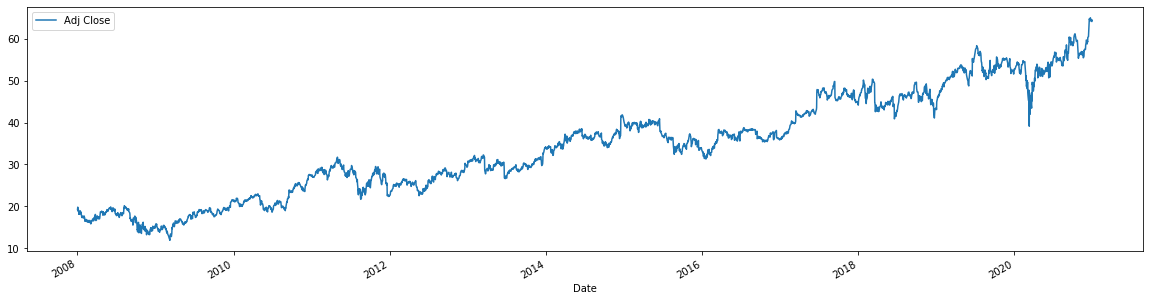

In [14]:
##visualizing the data

df.plot(figsize=(20,5))

In [15]:
###checking for WhiteNoise
df_wn = df.copy()
wn = np.random.normal(loc = df_wn.mean(), scale=df_wn.std(), size=len(df_wn))
df_wn['wn'] = wn

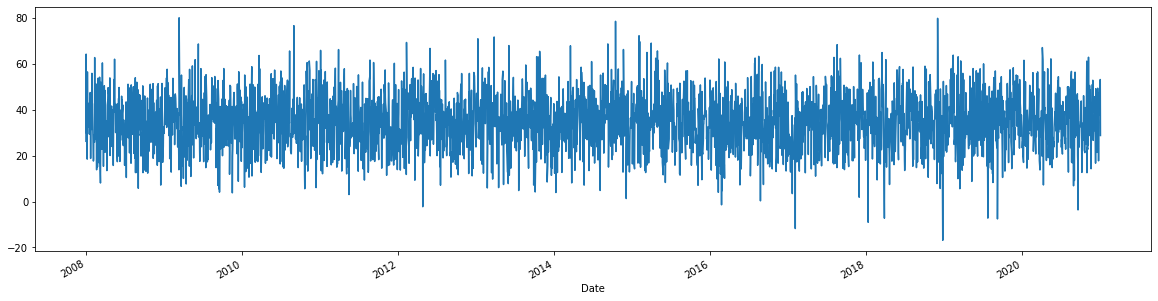

In [16]:
df_wn.wn.plot(figsize=(20, 5))
plt.show()

In [17]:
df_fbp = df.copy()

In [18]:
df_fbp.head()

,Adj Close
Date,
2008-01-02,19.255461
2008-01-03,19.786291
2008-01-04,18.861618
2008-01-07,19.049978
2008-01-08,18.108183


In [19]:
##checking for null values
df_fbp.isna().sum()

Adj Close    0
dtype: int64

Text(0.5, 1.0, 'Adj Close')

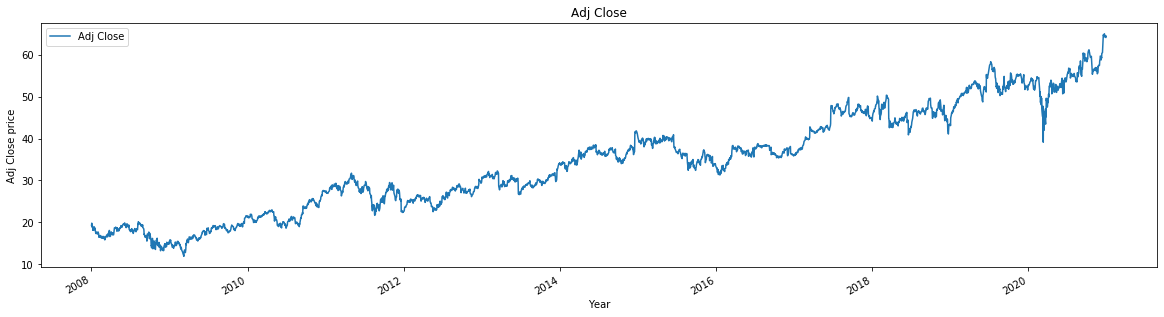

In [20]:
##visualizing the data
df_fbp.plot(figsize=(20,5))
plt.xlabel("Year")
plt.ylabel("Adj Close price")
plt.title("Adj Close")


In [21]:
##rename the input column as 'y'
df_fbp = df_fbp.rename(columns={'Adj Close': 'y'})

In [22]:
##create a new column for the date and name it 'ds'

df_fbp['ds'] = df_fbp.index.date

In [23]:
df_fbp.head()

,y,ds
Date,,
2008-01-02,19.255461,2008-01-02
2008-01-03,19.786291,2008-01-03
2008-01-04,18.861618,2008-01-04
2008-01-07,19.049978,2008-01-07
2008-01-08,18.108183,2008-01-08


In [24]:
##instantiate a Prophet object
model = Prophet()

In [25]:
model.component_modes   ##params used

In [26]:
##training the model
model.fit(df_fbp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
##Create 365 future dates
df_future = model.make_future_dataframe(periods=365)

In [28]:
##Using our built model "model" to predict the future one-year ahead
forecast = model.predict(df_future)
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-02,18.356760,15.633974,20.464484,18.356760,18.356760,-0.366345,-0.366345,-0.366345,-0.144956,-0.144956,-0.144956,-0.221390,-0.221390,-0.221390,0.0,0.0,0.0,17.990415
1,2008-01-03,18.350545,15.584719,20.677830,18.350545,18.350545,-0.390295,-0.390295,-0.390295,-0.165654,-0.165654,-0.165654,-0.224641,-0.224641,-0.224641,0.0,0.0,0.0,17.960251
2,2008-01-04,18.344331,15.360309,20.396535,18.344331,18.344331,-0.395991,-0.395991,-0.395991,-0.169522,-0.169522,-0.169522,-0.226469,-0.226469,-0.226469,0.0,0.0,0.0,17.948340
3,2008-01-07,18.325686,15.561423,20.433863,18.325686,18.325686,-0.366338,-0.366338,-0.366338,-0.142731,-0.142731,-0.142731,-0.223607,-0.223607,-0.223607,0.0,0.0,0.0,17.959347
4,2008-01-08,18.319471,15.430505,20.250370,18.319471,18.319471,-0.365816,-0.365816,-0.365816,-0.145702,-0.145702,-0.145702,-0.220114,-0.220114,-0.220114,0.0,0.0,0.0,17.953655
5,2008-01-09,18.313256,15.418809,20.338259,18.313256,18.313256,-0.360500,-0.360500,-0.360500,-0.144956,-0.144956,-0.144956,-0.215545,-0.215545,-0.215545,0.0,0.0,0.0,17.952755
6,2008-01-10,18.307041,15.442994,20.478272,18.307041,18.307041,-0.375705,-0.375705,-0.375705,-0.165654,-0.165654,-0.165654,-0.210051,-0.210051,-0.210051,0.0,0.0,0.0,17.931336
7,2008-01-11,18.300826,15.533346,20.388866,18.300826,18.300826,-0.373321,-0.373321,-0.373321,-0.169522,-0.169522,-0.169522,-0.203799,-0.203799,-0.203799,0.0,0.0,0.0,17.927505
8,2008-01-14,18.282181,15.454077,20.443486,18.282181,18.282181,-0.324961,-0.324961,-0.324961,-0.142731,-0.142731,-0.142731,-0.182230,-0.182230,-0.182230,0.0,0.0,0.0,17.957220
9,2008-01-15,18.275966,15.576141,20.375408,18.275966,18.275966,-0.320372,-0.320372,-0.320372,-0.145702,-0.145702,-0.145702,-0.174670,-0.174670,-0.174670,0.0,0.0,0.0,17.955594


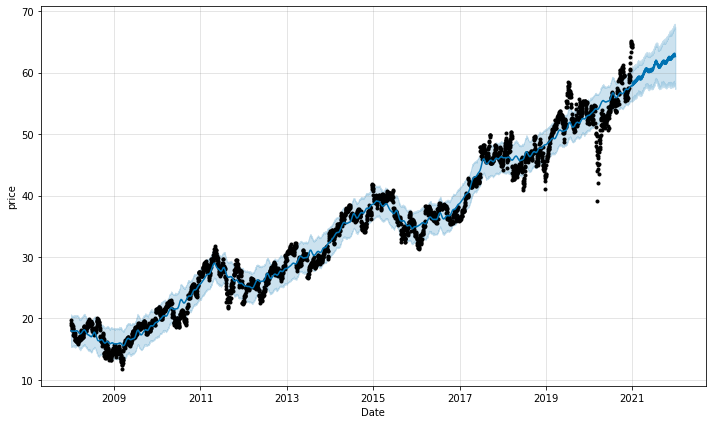

In [29]:
forecast_plot = model.plot(forecast, xlabel='Date', ylabel='price')

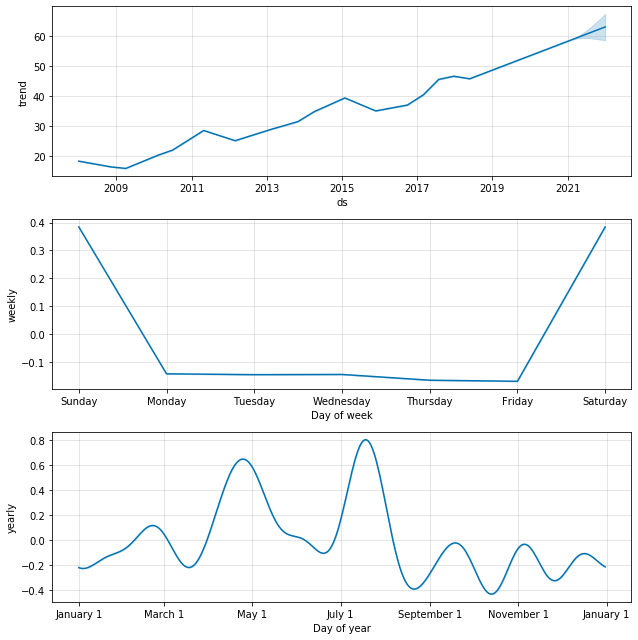

In [30]:
figure = model.plot_components(forecast)

In [31]:
prediction = forecast.copy()
prediction.index = pd.DatetimeIndex(prediction.ds)

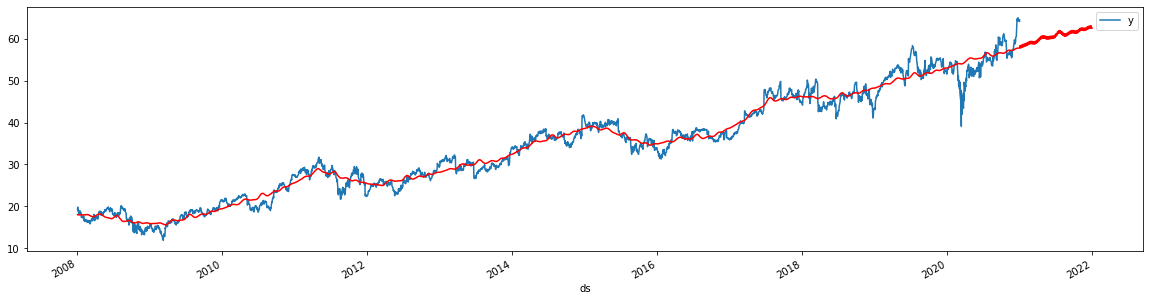

In [32]:
df_fbp.plot(figsize=(20,5))
prediction.yhat.plot(color='r')

In [33]:
####Analysis, Diagnostic and Cross Validation

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_cv.head(10)

INFO:fbprophet:Making 21 forecasts with cutoffs between 2010-02-22 00:00:00 and 2020-01-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-23,20.663346,19.930859,21.387131,21.158543,2010-02-22
1,2010-02-24,20.613937,19.881477,21.309575,21.409201,2010-02-22
2,2010-02-25,20.594134,19.880582,21.354543,21.495630,2010-02-22
3,2010-02-26,20.560155,19.831370,21.273132,21.305483,2010-02-22
4,2010-03-01,20.463102,19.664480,21.190680,21.383272,2010-02-22
5,2010-03-02,20.487498,19.793263,21.235298,21.244974,2010-02-22
6,2010-03-03,20.486434,19.792034,21.215926,21.175833,2010-02-22
7,2010-03-04,20.522356,19.776522,21.181720,21.400564,2010-02-22
8,2010-03-05,20.550605,19.793253,21.295299,21.564781,2010-02-22
9,2010-03-08,20.668381,19.928925,21.380048,21.348698,2010-02-22


In [34]:
df_pm = performance_metrics(df_cv)
df_pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,8.916676,2.986080,2.422422,0.070347,0.054926,0.399242
1,38 days,9.086188,3.014331,2.453155,0.071436,0.056390,0.389394
2,39 days,9.160933,3.026703,2.464956,0.071974,0.057233,0.388258
3,40 days,9.188912,3.031322,2.466598,0.072332,0.056390,0.390880
4,41 days,9.164503,3.027293,2.467829,0.072697,0.056331,0.391288


In [35]:
df_pm_tail = df_pm.tail()
df_pm_tail.to_excel('df_pm_tail.xlsx')

**Hyperparameter Tuning fbprophet**

In [36]:
cutoffs = pd.to_datetime(['2018-02-15', '2018-08-15', '2019-02-15'])
#df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')

In [37]:
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_fbp)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fec013f7d30>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fec013f7ba8>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fec016593c8>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fec01620748>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in par

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  3.066554
1                     0.001                     0.10  2.998525
2                     0.001                     1.00  3.001357
3                     0.001                    10.00  3.026289
4                     0.010                     0.01  1.174054
5                     0.010                     0.10  1.177582
6                     0.010                     1.00  1.158835
7                     0.010                    10.00  1.182602
8                     0.100                     0.01  1.399792
9                     0.100                     0.10  1.391295
10                    0.100                     1.00  1.395876
11                    0.100                    10.00  1.398039
12                    0.500                     0.01  1.681496
13                    0.500                     0.10  1.699253
14                    0.500                     1.00  1

In [38]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0}


In [39]:
param_grid = best_params

In [40]:
##prediction using best param settings
model2 = Prophet(**param_grid).fit(df_fbp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
predict2 = model2.predict(df_future)

In [42]:
predict2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-02,16.997032,13.375296,19.405917,16.997032,16.997032,-0.600826,-0.600826,-0.600826,-0.422801,-0.422801,-0.422801,-0.178025,-0.178025,-0.178025,0.0,0.0,0.0,16.396206
1,2008-01-03,16.997914,13.517443,19.318615,16.997914,16.997914,-0.627085,-0.627085,-0.627085,-0.451701,-0.451701,-0.451701,-0.175384,-0.175384,-0.175384,0.0,0.0,0.0,16.370828
2,2008-01-04,16.998795,13.234035,19.362509,16.998795,16.998795,-0.623063,-0.623063,-0.623063,-0.451425,-0.451425,-0.451425,-0.171639,-0.171639,-0.171639,0.0,0.0,0.0,16.375732
3,2008-01-07,17.001441,13.383316,19.186114,17.001441,17.001441,-0.580808,-0.580808,-0.580808,-0.426386,-0.426386,-0.426386,-0.154422,-0.154422,-0.154422,0.0,0.0,0.0,16.420633
4,2008-01-08,17.002322,13.375455,19.072265,17.002322,17.002322,-0.576939,-0.576939,-0.576939,-0.429889,-0.429889,-0.429889,-0.147050,-0.147050,-0.147050,0.0,0.0,0.0,16.425383


In [43]:
df_cv2 = cross_validation(model2, initial='730 days', period='180 days', horizon='365 days')
df_cv2.head(10)

INFO:fbprophet:Making 21 forecasts with cutoffs between 2010-02-22 00:00:00 and 2020-01-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-23,20.669558,19.890368,21.379012,21.158543,2010-02-22
1,2010-02-24,20.621680,19.885336,21.342402,21.409201,2010-02-22
2,2010-02-25,20.605718,19.812981,21.390618,21.495630,2010-02-22
3,2010-02-26,20.568646,19.756471,21.330593,21.305483,2010-02-22
4,2010-03-01,20.476660,19.756758,21.196313,21.383272,2010-02-22
5,2010-03-02,20.502937,19.712978,21.239257,21.244974,2010-02-22
6,2010-03-03,20.503518,19.743722,21.270495,21.175833,2010-02-22
7,2010-03-04,20.543390,19.818770,21.261203,21.400564,2010-02-22
8,2010-03-05,20.568641,19.803617,21.244109,21.564781,2010-02-22
9,2010-03-08,20.691591,19.949462,21.453443,21.348698,2010-02-22


In [44]:
df_pm2 = performance_metrics(df_cv2)
df_pm2.head()


,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,11.673213,3.416608,2.642674,0.077398,0.055536,0.507197
1,38 days,11.819718,3.437982,2.665257,0.078134,0.055863,0.503030
2,39 days,11.814450,3.437215,2.665751,0.078132,0.056217,0.503788
3,40 days,11.808072,3.436288,2.668094,0.078367,0.055536,0.504953
4,41 days,11.752722,3.428224,2.663763,0.078534,0.054711,0.507955


In [45]:
df_pm2_tail = df_pm2.tail()
df_pm2_tail.to_excel('df_pm2_tail.xlsx')

In [46]:
##Using our built model "model2" to predict the future one-year ahead
forecast2 = model2.predict(df_future)
forecast2.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-02,16.997032,13.320159,19.354757,16.997032,16.997032,-0.600826,-0.600826,-0.600826,-0.422801,-0.422801,-0.422801,-0.178025,-0.178025,-0.178025,0.0,0.0,0.0,16.396206
1,2008-01-03,16.997914,13.574617,19.358639,16.997914,16.997914,-0.627085,-0.627085,-0.627085,-0.451701,-0.451701,-0.451701,-0.175384,-0.175384,-0.175384,0.0,0.0,0.0,16.370828
2,2008-01-04,16.998795,13.356268,19.451831,16.998795,16.998795,-0.623063,-0.623063,-0.623063,-0.451425,-0.451425,-0.451425,-0.171639,-0.171639,-0.171639,0.0,0.0,0.0,16.375732
3,2008-01-07,17.001441,13.565256,19.458319,17.001441,17.001441,-0.580808,-0.580808,-0.580808,-0.426386,-0.426386,-0.426386,-0.154422,-0.154422,-0.154422,0.0,0.0,0.0,16.420633
4,2008-01-08,17.002322,13.218276,19.307269,17.002322,17.002322,-0.576939,-0.576939,-0.576939,-0.429889,-0.429889,-0.429889,-0.147050,-0.147050,-0.147050,0.0,0.0,0.0,16.425383
5,2008-01-09,17.003204,13.551201,19.506766,17.003204,17.003204,-0.561898,-0.561898,-0.561898,-0.422801,-0.422801,-0.422801,-0.139097,-0.139097,-0.139097,0.0,0.0,0.0,16.441306
6,2008-01-10,17.004086,13.553756,19.519506,17.004086,17.004086,-0.582430,-0.582430,-0.582430,-0.451701,-0.451701,-0.451701,-0.130729,-0.130729,-0.130729,0.0,0.0,0.0,16.421656
7,2008-01-11,17.004968,13.365020,19.523282,17.004968,17.004968,-0.573539,-0.573539,-0.573539,-0.451425,-0.451425,-0.451425,-0.122114,-0.122114,-0.122114,0.0,0.0,0.0,16.431429
8,2008-01-14,17.007613,13.448063,19.489139,17.007613,17.007613,-0.522856,-0.522856,-0.522856,-0.426386,-0.426386,-0.426386,-0.096470,-0.096470,-0.096470,0.0,0.0,0.0,16.484757
9,2008-01-15,17.008495,13.529368,19.453206,17.008495,17.008495,-0.518385,-0.518385,-0.518385,-0.429889,-0.429889,-0.429889,-0.088495,-0.088495,-0.088495,0.0,0.0,0.0,16.490110


In [47]:
prediction2 = forecast2.copy()
prediction2.index = pd.DatetimeIndex(prediction2.ds)

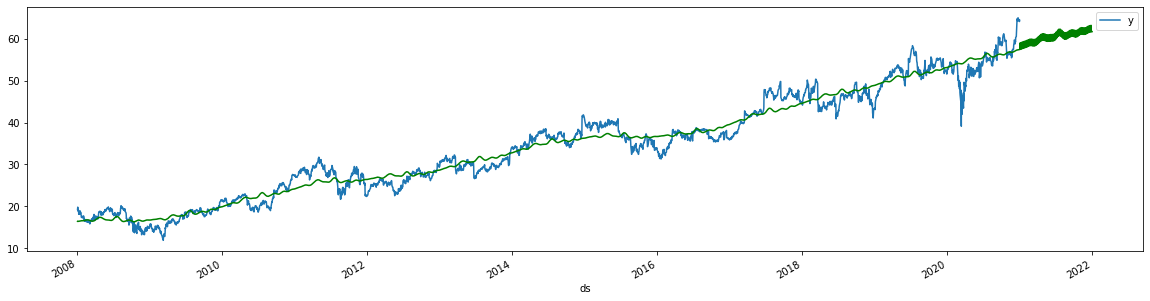

In [48]:
df_fbp.plot(figsize=(20,5))
prediction2.yhat.plot(color='g')

**xgboost:**
Using the in-built aws xgboost is quite an easy and fast approach. The XGBoost is mainly used for supervised and regression learnings, however, it is also known for its robust performance across all Machine Learning situations, and we would see how it performs in this time series prediction.

XGBoost is a special type of Gradient Boosting designed to be efficient and scalable. It is an assemble of Decision Trees, where new Trees fix errors of previous Trees already part of the model, and Trees are added until there are no further improvements able to be made to the model. Although this algorithm is mainly for Tabular data, it can also handle Time Series data

In [49]:
df

,Adj Close
Date,
2008-01-02,19.255461
2008-01-03,19.786291
2008-01-04,18.861618
2008-01-07,19.049978
2008-01-08,18.108183
...,...
2020-12-24,64.712372
2020-12-28,64.622719
2020-12-29,64.214279


In [50]:
df_xgb = df.copy()

In [51]:
##create a target column named 'y'
df_xgb['y'] = df_xgb['Adj Close'].shift(-1)

In [52]:
##using the forwrd fill method to fill for null values
df_xgb = df_xgb.fillna(method='ffill')

In [53]:
##checking for null values
df_xgb.isna().sum()

Adj Close    0
y            0
dtype: int64

In [54]:
df_xgb.head(10)

,Adj Close,y
Date,,
2008-01-02,19.255461,19.786291
2008-01-03,19.786291,18.861618
2008-01-04,18.861618,19.049978
2008-01-07,19.049978,18.108183
2008-01-08,18.108183,18.502026
2008-01-09,18.502026,18.561954
2008-01-10,18.561954,18.065376
2008-01-11,18.065376,18.887299
2008-01-14,18.887299,18.245174


In [55]:
y = df_xgb.drop(['Adj Close'], axis=1)
X = df_xgb.drop(['y'], axis=1)

In [56]:
##the data is split into train-test groups
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33)

In [57]:
##an extra data group is created for validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.33)

# Uploading Data to S3
> Since the XGBoost in-uilt algorithm is used, the data has to be uploaded to AWS S3

In [58]:
#import all necessary libraries for aws sagemaker

import sagemaker
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.predictor import csv_serializer
from sagemaker.xgboost.estimator import XGBoost

In [59]:
# This is our local data directory. We need to make sure that it exists.
data_dir = 'stock_xgb_data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [60]:
# We use pandas to save our test, train and validation data to csv files. Note that we make sure not to include header
# information or an index as this is required by the built in algorithms provided by Amazon. Also, for the train and
# validation data, it is assumed that the first entry in each row is the target variable.

X_test.to_csv(os.path.join(data_dir, 'test.csv'), header=False, index=False)

pd.concat([Y_val, X_val], axis=1).to_csv(os.path.join(data_dir, 'validation.csv'), header=False, index=False)
pd.concat([Y_train, X_train], axis=1).to_csv(os.path.join(data_dir, 'train.csv'), header=False, index=False)

In [61]:
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sagemaker_session.default_bucket()


In [62]:
prefix='XGB_Stock_prediction'

test_location = sagemaker_session.upload_data(os.path.join(data_dir, 'test.csv'), key_prefix=prefix)
val_location = sagemaker_session.upload_data(os.path.join(data_dir, 'validation.csv'), key_prefix=prefix)
train_location = sagemaker_session.upload_data(os.path.join(data_dir, 'train.csv'), key_prefix=prefix)

# Building and Training the model

> I would like to use the aws hyperparameter tuning for better results. 

In [63]:
# As stated above, we use this utility method to construct the image name for the training container.
container = get_image_uri(sagemaker_session.boto_region_name, 'xgboost','1.2-1')

# Now that we know which container to use, we can construct the estimator object.
xgb = sagemaker.estimator.Estimator(container, # The image name of the training container
                                    role,      # The IAM role to use (our current role in this case)
                                    train_instance_count=1, # The number of instances to use for training
                                    train_instance_type='ml.m4.xlarge', # The type of instance to use for training
                                    output_path='s3://{}/{}/output'.format(sagemaker_session.default_bucket(), prefix),
                                                                        # Where to save the output (the model artifacts)
                                    sagemaker_session=sagemaker_session) # The current SageMaker session

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [64]:
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        objective='reg:squarederror',
                        early_stopping_rounds=20,
                        num_round=500)

In [65]:
# This is a wrapper around the location of our train and validation data, to make sure that SageMaker
# knows our data is in csv format.
s3_input_train = sagemaker.TrainingInput(s3_data=train_location, content_type='csv')
s3_input_validation = sagemaker.TrainingInput(s3_data=val_location, content_type='csv')

In [66]:
xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})

INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2021-02-23-10-37-45-567


2021-02-23 10:37:45 Starting - Starting the training job...
2021-02-23 10:38:08 Starting - Launching requested ML instancesProfilerReport-1614076665: InProgress
......
2021-02-23 10:39:09 Starting - Preparing the instances for training......
2021-02-23 10:40:16 Downloading - Downloading input data...
2021-02-23 10:40:31 Training - Downloading the training image...
2021-02-23 10:41:17 Uploading - Uploading generated training model.INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:squarederror to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is

In [67]:
xgb_transformer = xgb.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2021-02-23-10-41-58-963


In [68]:
xgb_transformer.transform(test_location, content_type='text/csv', split_type='Line')

INFO:sagemaker:Creating transform job with name: sagemaker-xgboost-2021-02-23-10-41-59-471


...................................2021-02-23T10:47:42.573:[sagemaker logs]: MaxConcurrentTransforms=4, MaxPayloadInMB=6, BatchStrategy=MULTI_RECORD
[2021-02-23:10:47:40:INFO] No GPUs detected (normal if no gpus installed)
[2021-02-23:10:47:40:INFO] No GPUs detected (normal if no gpus installed)
[2021-02-23:10:47:40:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;

[2021-02-23:10:47:40:INFO] No GPUs detected (normal if no gpus installed)
[2021-02-23:10:47:40:INFO] No GPUs detected (normal if no gpus installed)
[2021-02-23:10:47:40:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;

worker_rlimit_nofile 4096;

events {
  worker_connections 2048;
}

http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;

  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }

  server {
    listen 8080 deferred;
    client_max_body_size 0;

In [69]:
!aws s3 cp --recursive $xgb_transformer.output_path $data_dir

download: s3://sagemaker-us-east-1-745263080552/sagemaker-xgboost-2021-02-23-10-41-59-471/test.csv.out to stock_xgb_data/test.csv.out
download: s3://sagemaker-us-east-1-745263080552/sagemaker-xgboost-2021-02-23-10-41-59-471/test.csv.out.out to stock_xgb_data/test.csv.out.out


In [70]:
Y_pred = pd.read_csv(os.path.join(data_dir, 'test.csv.out'), header=None)

Text(0.5, 1.0, 'Adj Closing Price vs Predicted Price')

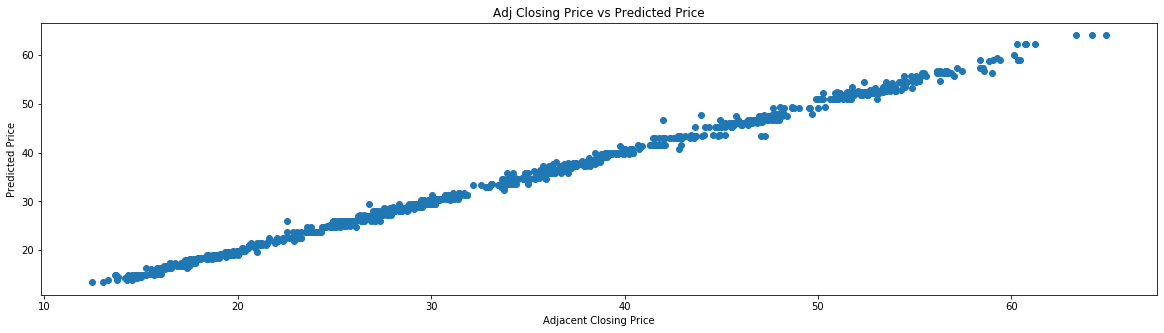

In [71]:
plt.figure(figsize=(20,5))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Adjacent Closing Price")
plt.ylabel("Predicted Price")
plt.title("Adj Closing Price vs Predicted Price")


In [72]:
##calculating metrics: MSE and RMSE for non tuned model
xgb_mse = mean_squared_error(Y_pred, Y_test)
xgb_rmse = mean_squared_error(Y_pred, Y_test, squared=False)
print('xgb_rmse: ', xgb_rmse)
print('xgb_mse: ', xgb_mse)

xgb_rmse:  0.619825572224999
xgb_mse:  0.3841837399840474


**Hyperparameter tuning to choose from multiple hyperparameters options the best result xgboost**

In [73]:
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner

xgb_hyperparameter_tuner = HyperparameterTuner(estimator = xgb, # The estimator object to use as the basis for the training jobs.
                                               objective_metric_name = 'validation:rmse', # The metric used to compare trained models.
                                               objective_type = 'Minimize', # Whether we wish to minimize or maximize the metric.
                                               max_jobs = 20, # The total number of models to train
                                               max_parallel_jobs = 3, # The number of models to train in parallel
                                               hyperparameter_ranges = {
                                                    'max_depth': IntegerParameter(3, 12),
                                                    'eta'      : ContinuousParameter(0.05, 0.5),
                                                    'min_child_weight': IntegerParameter(2, 8),
                                                    'subsample': ContinuousParameter(0.5, 0.9),
                                                    'gamma': ContinuousParameter(0, 10),
                                               })

In [74]:
xgb_hyperparameter_tuner.fit({'train': s3_input_train, 'validation': s3_input_validation})

INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating hyperparameter tuning job with name: sagemaker-xgboost-210223-1048


....................................................................................................................................................................................................................................................................................................................................................................................!


In [75]:
xgb_hyperparameter_tuner.wait()

!


In [76]:
xgb_hyperparameter_tuner.best_training_job()

'sagemaker-xgboost-210223-1048-017-8c5e44de'

In [77]:
xgb_attached = sagemaker.estimator.Estimator.attach(xgb_hyperparameter_tuner.best_training_job())


2021-02-23 11:14:30 Starting - Preparing the instances for training
2021-02-23 11:14:30 Downloading - Downloading input data
2021-02-23 11:14:30 Training - Training image download completed. Training in progress.
2021-02-23 11:14:30 Uploading - Uploading generated training model
2021-02-23 11:14:30 Completed - Training job completed


In [78]:
xgb_transformer = xgb_attached.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2021-02-23-11-19-38-114


In [79]:
xgb_transformer.transform(test_location, content_type='text/csv', split_type='Line')

INFO:sagemaker:Creating transform job with name: sagemaker-xgboost-2021-02-23-11-19-38-498


.................................
[2021-02-23:11:25:01:INFO] No GPUs detected (normal if no gpus installed)
[2021-02-23:11:25:01:INFO] No GPUs detected (normal if no gpus installed)
[2021-02-23:11:25:01:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;

worker_rlimit_nofile 4096;

events {
  worker_connections 2048;
}

http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;

  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }

  server {
    listen 8080 deferred;
    client_max_body_size 0;

    keepalive_timeout 3;

    location ~ ^/(ping|invocations|execution-parameters) {
      proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
      proxy_set_header Host $http_host;
      proxy_redirect off;
      proxy_read_timeout 60s;
      proxy_pass http://gunicorn;
    }

    location / {
      return 404 "{}";
    }

  }
}


2021/02/23 11:25:01 [crit] 19#19: *1 co

In [80]:
!aws s3 cp --recursive $xgb_transformer.output_path $data_dir

download: s3://sagemaker-us-east-1-745263080552/sagemaker-xgboost-2021-02-23-11-19-38-498/test.csv.out to stock_xgb_data/test.csv.out
download: s3://sagemaker-us-east-1-745263080552/sagemaker-xgboost-2021-02-23-11-19-38-498/test.csv.out.out to stock_xgb_data/test.csv.out.out


In [81]:
Y_pred = pd.read_csv(os.path.join(data_dir, 'test.csv.out'), header=None)

Text(0.5, 1.0, 'Adj Closing Price vs Predicted Price')

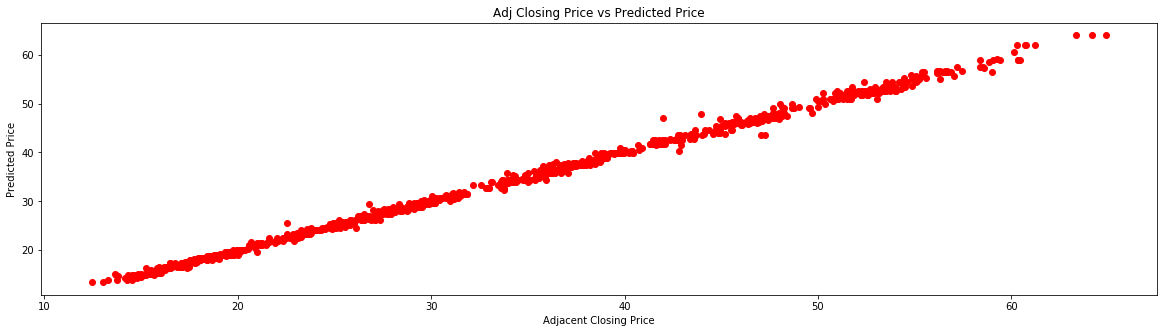

In [82]:
plt.figure(figsize=(20,5))
plt.scatter(Y_test, Y_pred, color='r')
plt.xlabel("Adjacent Closing Price")
plt.ylabel("Predicted Price")
plt.title("Adj Closing Price vs Predicted Price")


In [83]:
##calculating metrics: MSE and RMSE for hyperparameter tuned model
xgb_mse = mean_squared_error(Y_pred, Y_test)
xgb_rmse = mean_squared_error(Y_pred, Y_test, squared=False)
print('xgb_rmse: ', xgb_rmse)
print('xgb_mse: ', xgb_mse)

xgb_rmse:  0.5937519994019596
xgb_mse:  0.3525414367938246


In [84]:
# First we will remove all of the files contained in the data_dir directory
#!rm $data_dir/*

# And then we delete the directory itself
#!rmdir $data_dir

In [85]:
!rm $data_dir/*
!rmdir $data_dir